In [1]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Simulating Statistics 

In [2]:
united = Table().read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


### Typical time of all delays

In [3]:
np.median(united.column('Delay'))

2.0

### Typical time of 10 random delays

In [4]:
np.median(united.sample(10).column('Delay'))

7.0

In [13]:
#np.media
np.median(united.sample(10).column('Delay'))

2.5

#### Write a function that given a specified sample size called `size`, returns the statistic we are computing?


The statistic we are computing is the mean of the samples

What type is `size` here?

In [14]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [15]:
sample_median(1)

42.0

In [25]:
sample_median(united.num_rows)

2.0

<details>,
<summary>Solution</summary>
  np.median(united.sample(size).column('Delay'))
</details>


Now, for 1000 simulations, lets compute the median from 1,00 samples and plot the 1000 simulated medians

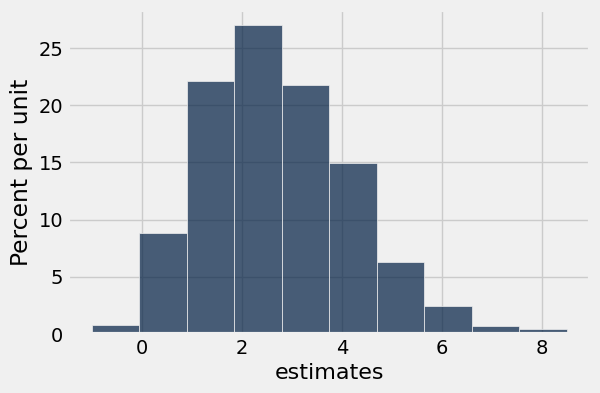

In [30]:
estimates = make_array()
size = 100
for _ in np.arange(1000): 
    estimates = np.append(estimates, sample_median(size))
    
Table().with_column('estimates', estimates).hist()

<details>,
<summary>Solution</summary>
  estimates = make_array()
size = 100
for _ in np.arange(1000):
    estimates = np.append(estimates, sample_median(size))
Table().with_column('estimates', estimates).hist()
</details>

#### Empirical Distributions Overlayed

Now let's repeat this process, instead of running 100 simulations, lets run 2000 simulations. We'll also change the sample size to be 10, 100, and 1,000.

In [31]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

Now lets add these to a table

In [32]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)
sample_medians 

Size 10,Size 100,Size 1000
2,3,3
7.5,3,3
3.5,8,2
23,1,2
3,0.5,2
2.5,2.5,2.5
19.5,1.5,2.5
4.5,4,2
0,6,2
3,2,3


And now lets plot these distributions?

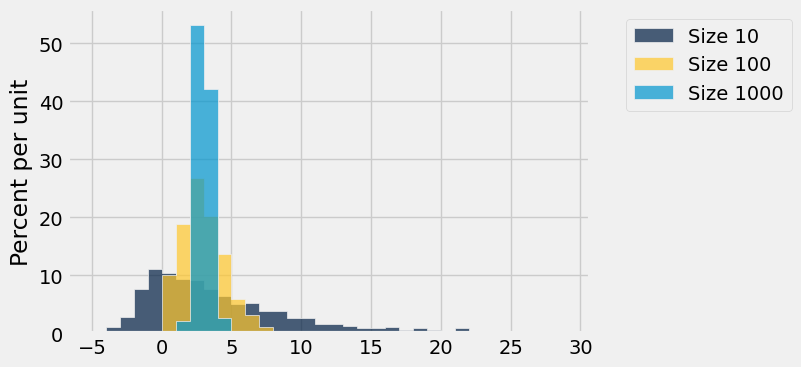

In [33]:
sample_medians.hist(bins = np.arange(-5, 30))

***Question:*** What type of distributions are these? Probability or empirical?

<br><br><br> *(Back to slides - Hypothesis Testing)*

# Swain vs. Alabama


In [34]:
population_proportions = make_array(.26, .74)
population_proportions

array([ 0.26,  0.74])

In [37]:
sample_proportions(100, population_proportions)

array([ 0.25,  0.75])

In [38]:
def panel_proportion():
    '''Lets add this doc string
    What is this function doing?
    Determining the percent of black males in the simulated jury panel
    '''
    return sample_proportions(100, population_proportions).item(0)

In [41]:
panel_proportion()

0.25

In [42]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)
    

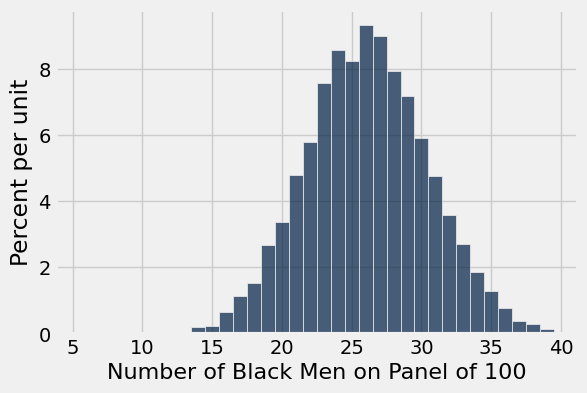

In [44]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))

### Where is most of the data?

### What percent of our samples had just 8 black men?

*Hint: area of bin = % of data in our samples in the bin*

### Model Assesment:
Is the data consistent with the model of random sampling from the population of eligible jurors?

(back to slides)

# Mendel's Pea Flowers


In [45]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [46]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([ 0.76964478,  0.23035522])

In [47]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [48]:
purple_flowers()

74.3810548977395

In [49]:
purple_flowers()

76.10333692142089

In [50]:
purple_flowers()

75.8880516684607

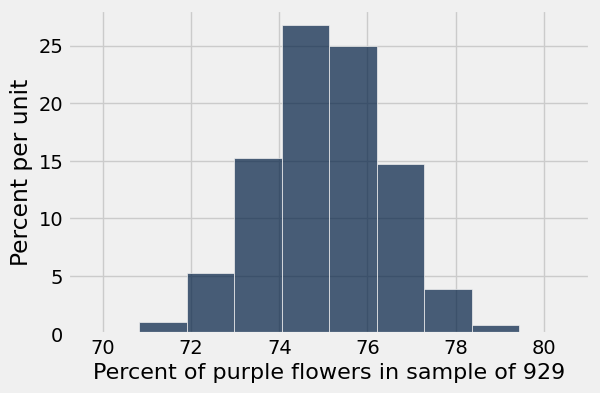

In [51]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

### Let's compute the distance

In [52]:
abs(observed_purples * 100 - 75)

1.318622174381062

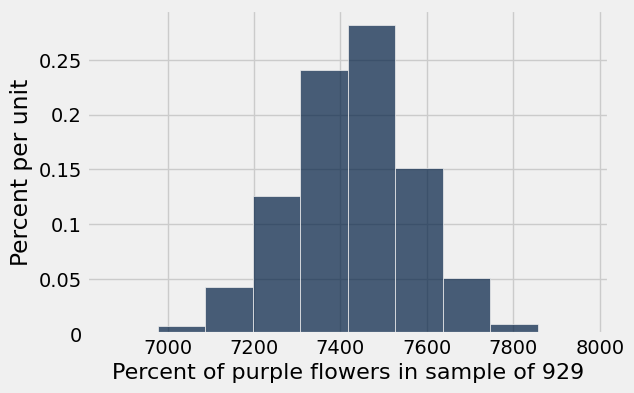

In [56]:
purples = make_array()

for i in np.arange(10000):
    new_purple = abs(purple_flowers() * 100 - 75)
    purples = np.append(purples, new_purple)
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()
